# Chapter 33. Nonparametric permutation testing

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import norm
from scipy.signal import convolve2d

import skimage.measure

#### Figure 33.1

p_n = 0.021
p_z = 0.023


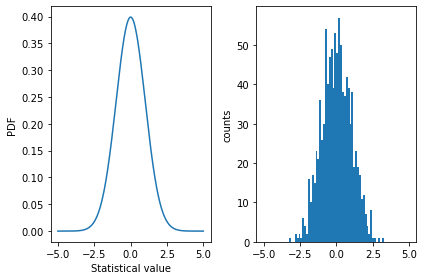

In [14]:
x = np.arange(-5,5, .01)
pdf = norm.pdf(x)
data = np.random.randn(1000)

fig, ax = plt.subplots(1,2, sharex='all')

ax[0].plot(x, pdf)
ax[0].set(ylabel='PDF', xlabel='Statistical value')

ax[1].hist(data, bins=50)
ax[1].set(ylabel='counts')

fig.tight_layout()

### 33.3
Using the same fig/data as 33.1

In [ ]:
print(f'p_n = {sum(data>2)/1000:.3f}')
print(f'p_z = {1-norm.cdf(2):.3f}')

### 33.5/6

These are generated in chap 34.

### 33.8

There are 12 unique blobs


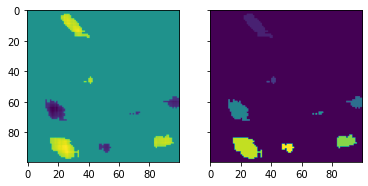

In [48]:
np.random.seed(1)
# create random smoothed map
xi, yi = np.meshgrid(np.arange(-10, 11), np.arange(-10, 11))
zi = xi**2 + yi**2
zi = 1 - (zi/np.max(zi))

map = convolve2d(np.random.randn(100,100), zi,'same')

# threshold at arb value
mapt = map.copy()
mapt[(np.abs(map)<map.flatten().std()*2)] = 0

# turn binary
bw_map = mapt!=0

conn_comp = skimage.measure.label(bw_map)

fig, ax = plt.subplots(1,2,sharex='all',sharey='all')
ax[0].imshow(mapt)
ax[1].imshow(conn_comp)

print(f'There are {len(np.unique(conn_comp))} unique blobs')

### 33.9

Rather than do perm testing on the spectrogram I'll just write the code below using the data we generated above.

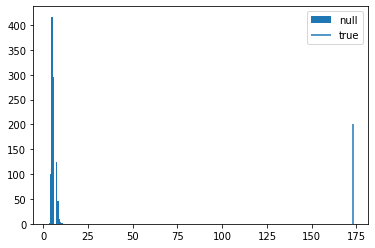

In [71]:
def max_blob_size(img):
    """helper function to compute max blob size"""
    bw_img = img != 0
    blobbed = skimage.measure.label(bw_img)
    num_blobs = len(np.unique(blobbed))
    max_size = max([np.sum(blobbed==i) for i in range(1, num_blobs)])
    return max_size

n_perms = 1000
max_sizes = []
for _ in range(n_perms):
    mapt_flat = mapt.flatten()
    rand_flat = np.random.permutation(mapt_flat)
    mapt_permuted = rand_flat.reshape(mapt.shape)

    max_sizes.append(max_blob_size(mapt_permuted))

plt.hist(max_sizes, label='null')
plt.vlines(max_blob_size(mapt), 0, 200, label='true', color='red')
plt.legend()

### 33.10

This fig relies on external code, and I would rather not have more required libraries than necessary.
The statsmodels library provides a False Discovery Rate method that is easy to use and is applicable here.
